## Project 1 Submission - Group 6
Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang

In [1]:
## Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:


df = pd.read_csv('data/tn.movie_budgets.csv.gz')

## checking dataframe
## questions to think about:
    ## what are the highest gross values for both domestic and worldwide?
    ## what's the ratio of production budget to gross?
    ## are there any values we can reasonably say won't help answer our questions?
        ## such as gross values that are too low and can be removed from our working dataset?
        

df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [3]:
## checking datatypes and checking for any missing values
## observations:
    ## 5782 total entries with no missing values
    ## release_date is object and should be changed to datetime
    ## production_budget, domestic_gross, & worldwide_gross are object datatypes & should be changed to int

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
## changing release_date datatype from object to datetime

df['release_date'] = pd.to_datetime(df['release_date'])


## changing object datatypes to integer

df['production_budget'] = df['production_budget'].str.replace( ',' , '')
df['production_budget'] = df['production_budget'].str.replace( '$' , '')
df['production_budget'] = pd.to_numeric(df['production_budget'])

df['domestic_gross'] = df['domestic_gross'].str.replace( ',' , '')
df['domestic_gross'] = df['domestic_gross'].str.replace( '$' , '')
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])

df['worldwide_gross'] = df['worldwide_gross'].str.replace( ',' , '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace( '$' , '')
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'])

In [5]:
## checking updated df

df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923


In [6]:
## checking updated df datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [7]:
## observations:
## there are a lot of domestic gross values that are 0 that can reasonably be removed from the working dataset
## we can probably also reasonably remove rows where the gross is "too low"

print(list(df['domestic_gross'].sort_values(ascending=False)))

[936662225, 760507625, 700059566, 678815482, 659363944, 652270625, 623279547, 620181382, 608581744, 533720947, 532177324, 504014165, 486295561, 474544677, 460998007, 459005868, 448139099, 441226247, 435110554, 426525952, 424668047, 423315812, 421785283, 417719760, 415004880, 412563408, 408992272, 408084349, 408010692, 404508916, 403706375, 402111870, 400738009, 395708305, 389813101, 381193157, 380529370, 380270577, 377845905, 376057266, 373524485, 370782930, 368384330, 368065385, 364001123, 363070709, 356461711, 353007020, 352390543, 350126372, 342548984, 341268248, 337135885, 336530303, 336045770, 335061807, 334201140, 334191110, 333172112, 330360194, 330151138, 327481748, 325100054, 324591735, 322719944, 319246193, 318604126, 317871467, 317101119, 315544750, 315058289, 312433331, 310676740, 309420425, 309205079, 306169255, 305411224, 304360277, 303003568, 302089278, 300531751, 296623634, 296131568, 293506292, 293004164, 292576195, 292324737, 292137260, 291710957, 291045518, 290271960

In [8]:
## removing rows with domestic_gross < 20,000,000

df = df[df['domestic_gross'] > 20000000]

## we've reduced the number of entries to 2727

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 0 to 5745
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2727 non-null   int64         
 1   release_date       2727 non-null   datetime64[ns]
 2   movie              2727 non-null   object        
 3   production_budget  2727 non-null   int64         
 4   domestic_gross     2727 non-null   int64         
 5   worldwide_gross    2727 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 149.1+ KB


In [29]:
## creating two new columns for domestic profit and worldwide profit
## removing rows with negative profits

df['domestic_profit'] = (df['domestic_gross'] - df['production_budget'])
df['worldwide_profit'] = (df['worldwide_gross'] - df['production_budget'])
df = df[(df['domestic_profit'] > 0) & (df['worldwide_profit'] > 0)]
df = df[(df['release_date']) > '2010-01-01']
df.sort_values(by='domestic_gross', ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,332177324,849102856
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706
45,46,2016-06-17,Finding Dory,200000000,486295561,1021215193,286295561,821215193


In [30]:
## sort df by highest domestic profits

df_dp = df.sort_values(by=['domestic_profit'], ascending=False)
df_dp.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,332177324,849102856
537,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,328010692,597923379
437,38,2017-12-20,Jumanji: Welcome to the Jungle,90000000,404508916,964496193,314508916,874496193


In [31]:
## sort df by highest worldwide profits

df_wp = df.sort_values(by=['worldwide_profit'], ascending=False)
df_wp

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
...,...,...,...,...,...,...,...,...
3070,71,2010-12-22,Country Strong,15000000,20218921,20601987,5218921,5601987
2235,36,2014-04-11,Draft Day,25000000,28842237,29847480,3842237,4847480
2948,49,2018-06-13,Superfly,16000000,20537137,20723581,4537137,4723581
2085,86,2012-01-13,Joyful Noise,27500000,30932113,31157914,3432113,3657914


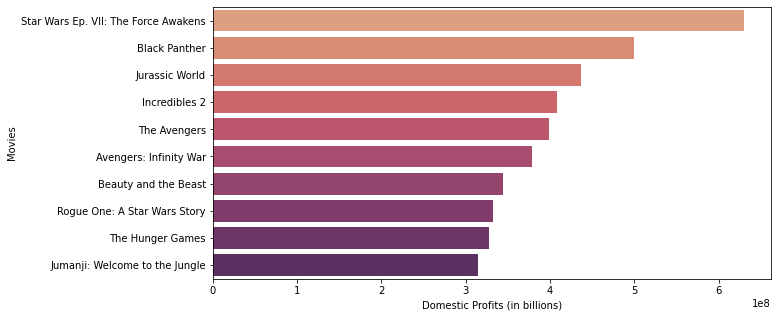

In [32]:
## data visualization

fig, ax = plt.subplots(figsize=(10,5))

x1 = df_dp['movie'][0:10]
y1 = df_dp['domestic_profit'][0:10]

ax = sns.barplot(x=y1, y=x1, palette='flare')
ax.set(xlabel='Domestic Profits (in billions)', ylabel='Movies');

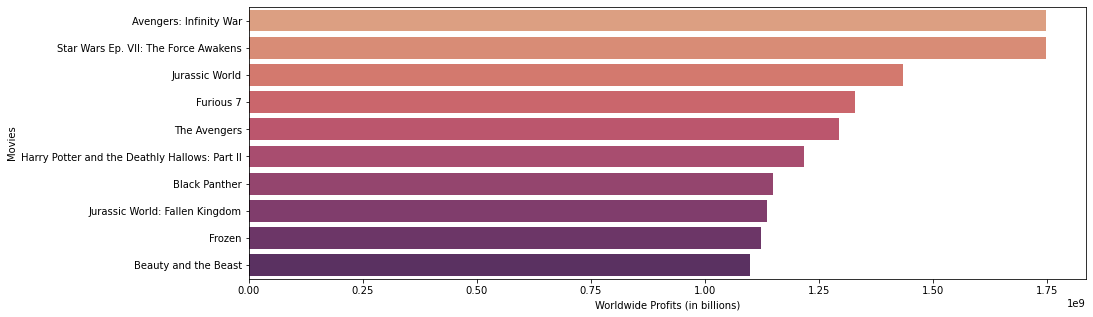

In [33]:
fig, ax = plt.subplots(figsize=(15,5))

x2 = df_wp['movie'][0:10]
y2 = df_wp['worldwide_profit'][0:10]

ax = sns.barplot(x=y2, y=x2, palette='flare')
ax.set(xlabel='Worldwide Profits (in billions)', ylabel='Movies');

In [ ]:
"""
Avengers: Infinity War [Action, Adventure, Scifi]
Furious 7 [Action, Crime, Thriller]



"""